In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [3]:
df = pd.read_csv('train.csv', delimiter=';')
df.drop(columns=['day', 'month'], inplace=True)
print(df.info()) 
print(df.describe())
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   duration   45211 non-null  int64 
 10  campaign   45211 non-null  int64 
 11  pdays      45211 non-null  int64 
 12  previous   45211 non-null  int64 
 13  poutcome   45211 non-null  object
 14  y          45211 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.2+ MB
None
                age        balance      duration      campaign         pdays  \
count  45211.000000   45211.000000  45211.000000  45211.000000  45211.000000   
mean      40.

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [4]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,198,1,-1,0,unknown,no


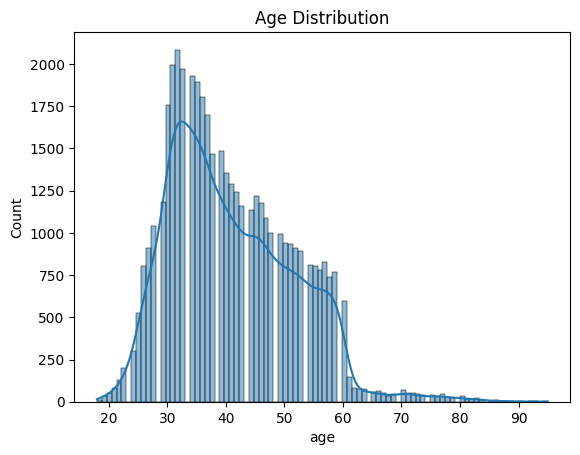

In [5]:
sns.histplot(df['age'], kde=True)
plt.title('Age Distribution')
plt.show()

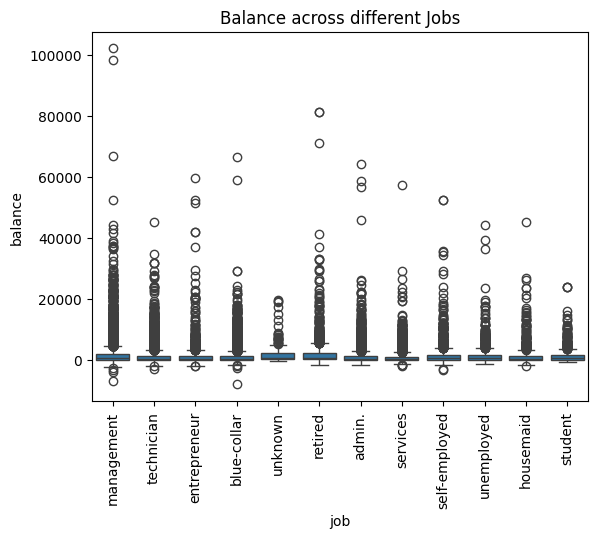

In [6]:
sns.boxplot(x='job', y='balance', data=df)
plt.title('Balance across different Jobs')
plt.xticks(rotation=90)
plt.show()

In [7]:
categorical_cols = ['y', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'poutcome']
numerical_cols = ['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']

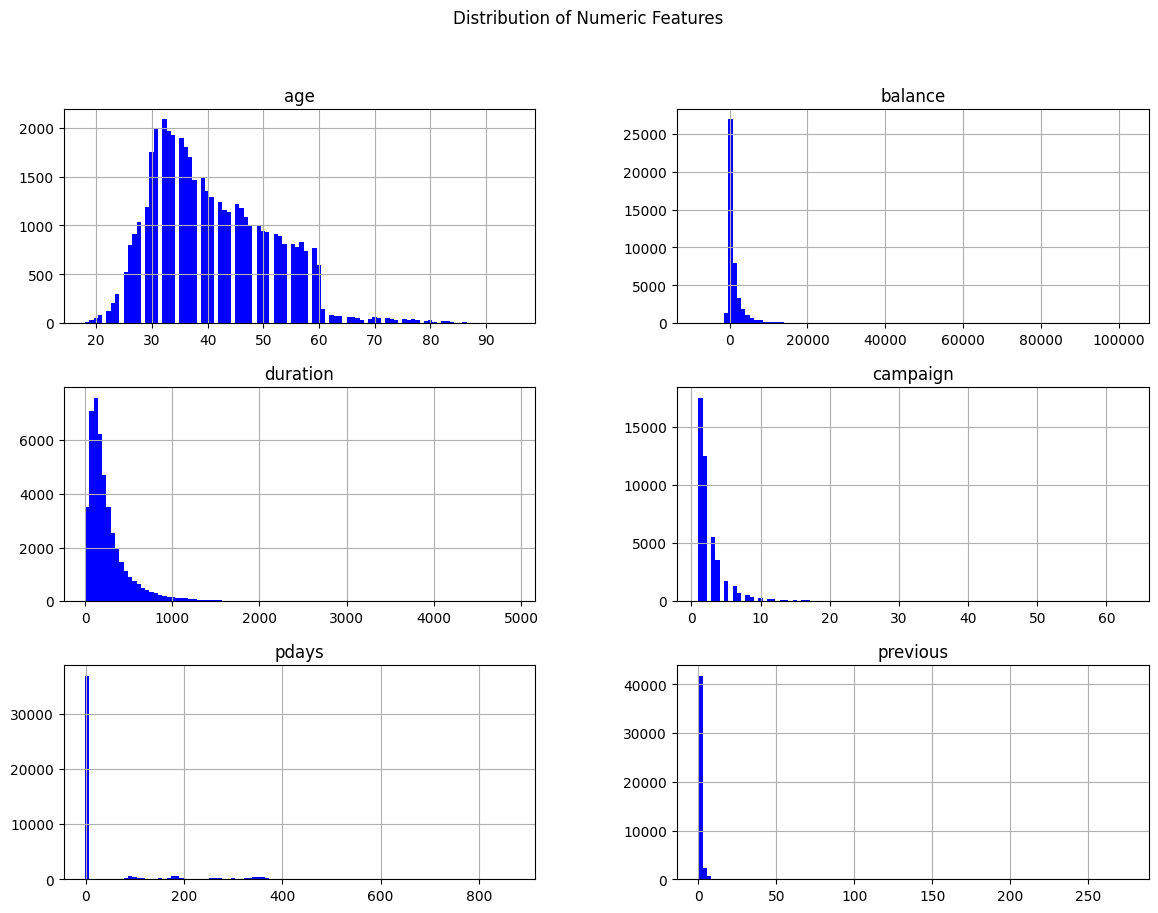

In [8]:
df[numerical_cols].hist(bins=100, figsize=(14, 10), color='blue')
plt.suptitle('Distribution of Numeric Features')
plt.show()

In [9]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(), categorical_cols)
    ])

In [10]:
X = preprocessor.fit_transform(df)

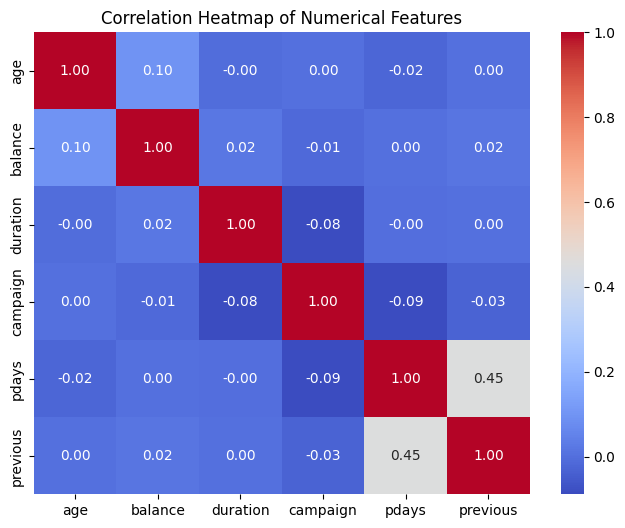

In [11]:
corr_matrix = df[numerical_cols].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

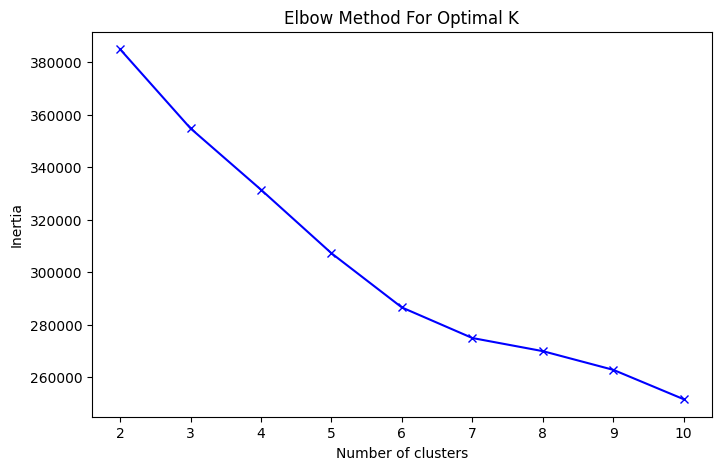

In [12]:
inertia = []
K = range(2, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(K, inertia, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal K')
plt.show()


In [13]:
optimal_clusters = 6
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
clusters = kmeans.fit_predict(X)

In [14]:
df['cluster'] = clusters

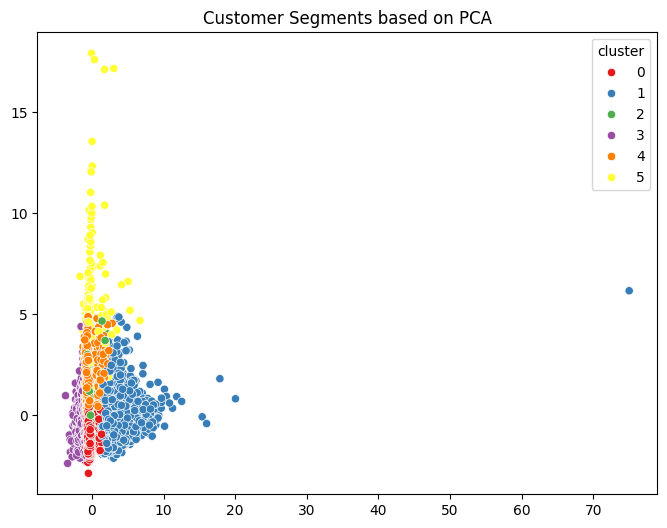

In [15]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=df['cluster'], palette='Set1')
plt.title('Customer Segments based on PCA')
plt.show()


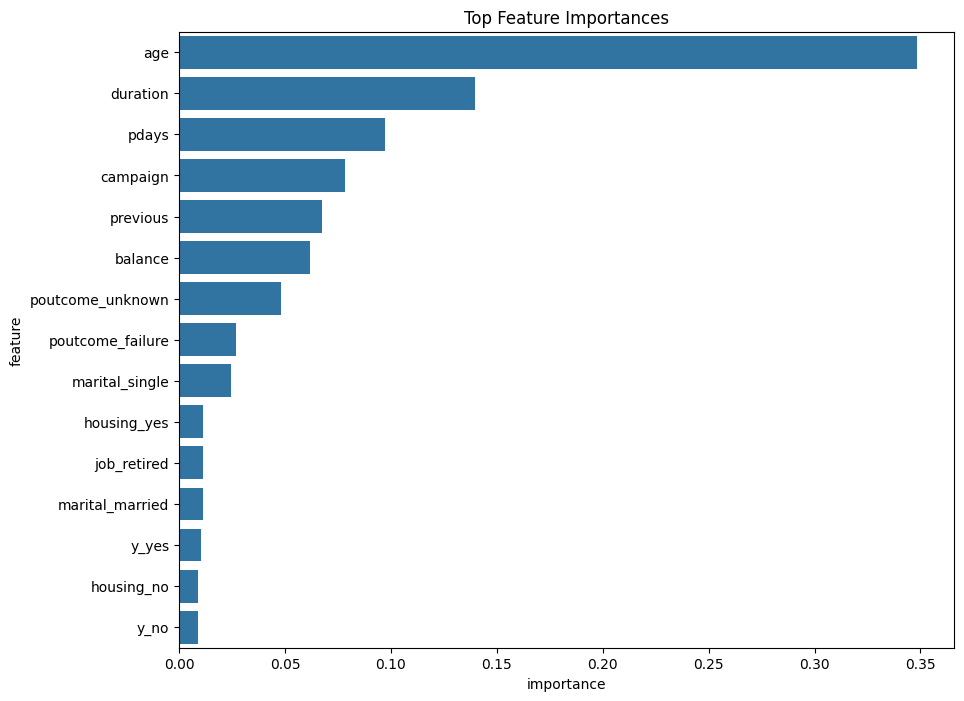

In [16]:
from sklearn.ensemble import RandomForestClassifier
rf_df = df.copy()
rf_df = pd.get_dummies(rf_df, columns=categorical_cols)

# Random Forest Model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(rf_df.drop(columns='cluster'), rf_df['cluster'])

importances = rf.feature_importances_

encoded_feature_names = np.hstack([
    numerical_cols,
    preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_cols)
])

feature_importance_df = pd.DataFrame({
    'feature': encoded_feature_names,
    'importance': importances
})

feature_importance_df = feature_importance_df.sort_values(by='importance', ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(x='importance', y='feature', data=feature_importance_df.head(15))
plt.title('Top Feature Importances')
plt.show()

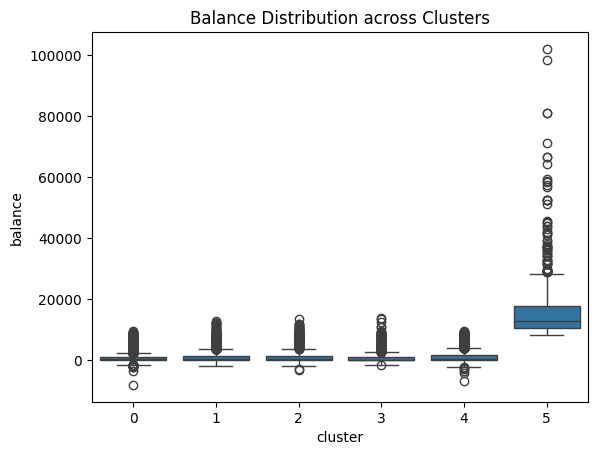

In [17]:
sns.boxplot(x='cluster', y='balance', data=df)
plt.title('Balance Distribution across Clusters')
plt.show()

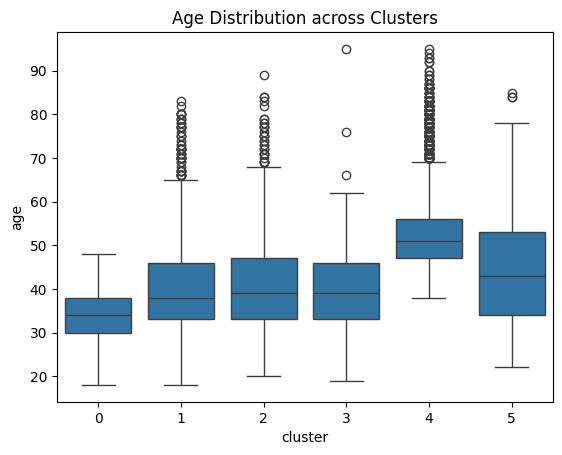

In [18]:
sns.boxplot(x='cluster', y='age', data=df)
plt.title('Age Distribution across Clusters')
plt.show()

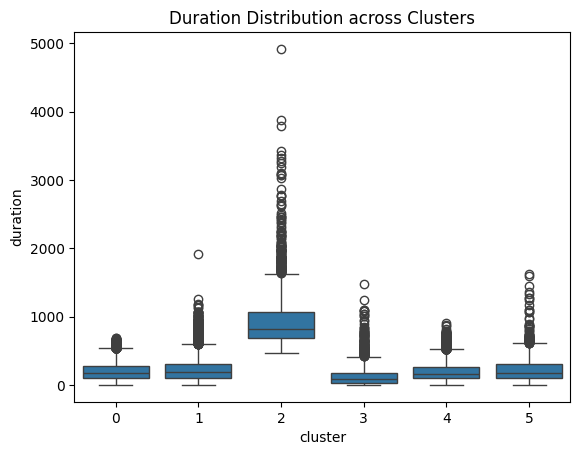

In [19]:
sns.boxplot(x='cluster', y='duration', data=df)
plt.title('Duration Distribution across Clusters')
plt.show()

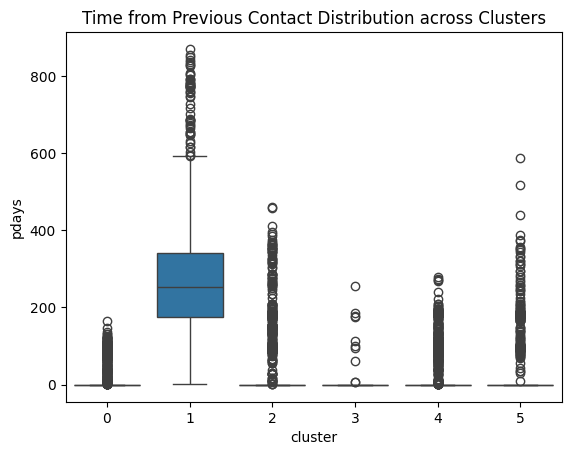

In [20]:
sns.boxplot(x='cluster', y='pdays', data=df)
plt.title('Time from Previous Contact Distribution across Clusters')
plt.show()

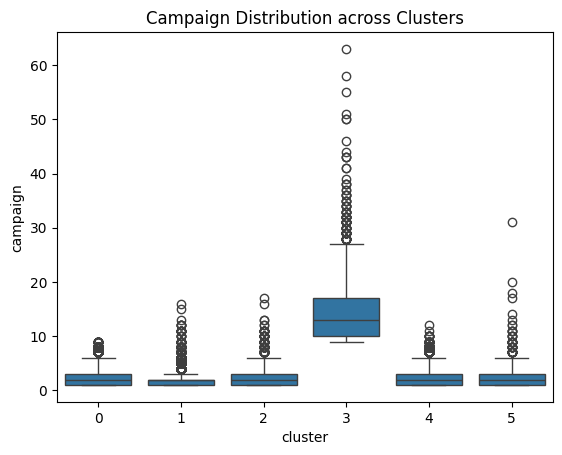

In [21]:
sns.boxplot(x='cluster', y='campaign', data=df)
plt.title('Campaign Distribution across Clusters')
plt.show()

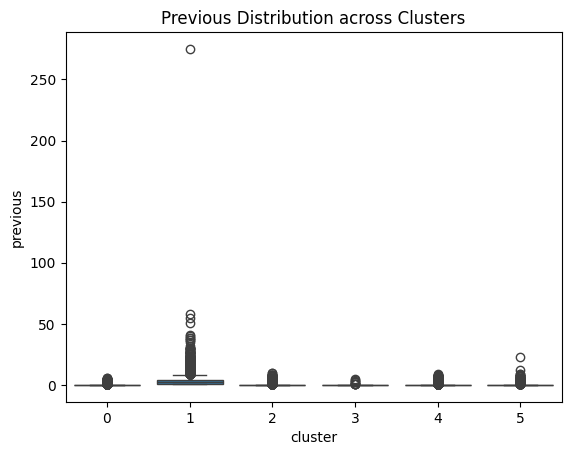

In [22]:
sns.boxplot(x='cluster', y='previous', data=df)
plt.title('Previous Distribution across Clusters')
plt.show()